
# Project: Investigate a no-show dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report is to investigate a 100K patient data, main purpose of the data set is to show whether the patient showed up on there appointment or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Read data and convert it to data frame
df = pd.read_csv('KaggleV2-May-2016.csv')

In [4]:
# Exploring general information about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check if there are any null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data Cleaning

In [7]:
# Rename columns to make operations easier
df.rename(columns = lambda x: x.strip().lower().replace("-", "_"), inplace = True)
# Checking if changes are applied
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Changing columns data types 
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Checking if changes are applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [9]:
# Renaming a column with a grammatic error
df.rename(columns = {'hipertension':'hypertension'}, inplace = True)

In [10]:
# Drop wrong data
wrong = df.query('age == -1')
df.drop( wrong.index, axis = 0, inplace = True)

> After doing some investigation I found out that age with the value (-1) is a pregnenat woman but I'm going to drop it anyway since it's only one patient.

In [11]:
# Checking if there anything to clean

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110526 non-null  float64            
 1   appointmentid   110526 non-null  int64              
 2   gender          110526 non-null  object             
 3   scheduledday    110526 non-null  datetime64[ns, UTC]
 4   appointmentday  110526 non-null  datetime64[ns, UTC]
 5   age             110526 non-null  int64              
 6   neighbourhood   110526 non-null  object             
 7   scholarship     110526 non-null  int64              
 8   hypertension    110526 non-null  int64              
 9   diabetes        110526 non-null  int64              
 10  alcoholism      110526 non-null  int64              
 11  handcap         110526 non-null  int64              
 12  sms_received    110526 non-null  int64              
 13  no_show       

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

<br>
<br>
<br>

### Research Question 1 (Is the clinic disabaled friendly?)

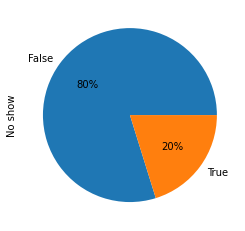

In [12]:
# See the original no show rate of the whole data
df.no_show.value_counts().plot(kind = 'pie', labels=['False', 'True'],  autopct='%1.0f%%')
plt.ylabel('No show');

In [13]:
# Plot_bar function to help with plotting bars
def plot_bar(location, height, labels = None, title = None, xlabel = None, ylabel=None, color = None):
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = "Consolas"
    plt.bar(location, height, tick_label = labels, color = color, width = 0.2)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)

In [14]:
# Filter only disabled people
hand_cap = df.query('handcap > 0').no_show.value_counts()

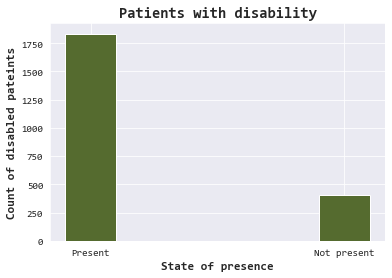

In [15]:
plot_bar([1, 2], hand_cap, ['Present', 'Not present'], 'Patients with disability', 'State of presence',
         'Count of disabled pateints', 'darkolivegreen')


> Looks like the clinic is actually disabled friendly but we can investigate more about why a portion of disabled people probably a third, don't make it to their appointemnt. Let's see if the level of disability affects showing up.


In [16]:
df['handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

> There are actually not that much of people with a disability level more than 1 with total number of 199, but let's investigate more.

In [17]:
# Filtering data based on the level of disability
hand_cap1 = df.query('handcap == 1').no_show.value_counts()
hand_cap2 = df.query('handcap == 2').no_show.value_counts()
hand_cap3 = df.query('handcap == 3').no_show.value_counts()
hand_cap4 = df.query('handcap == 4').no_show.value_counts()

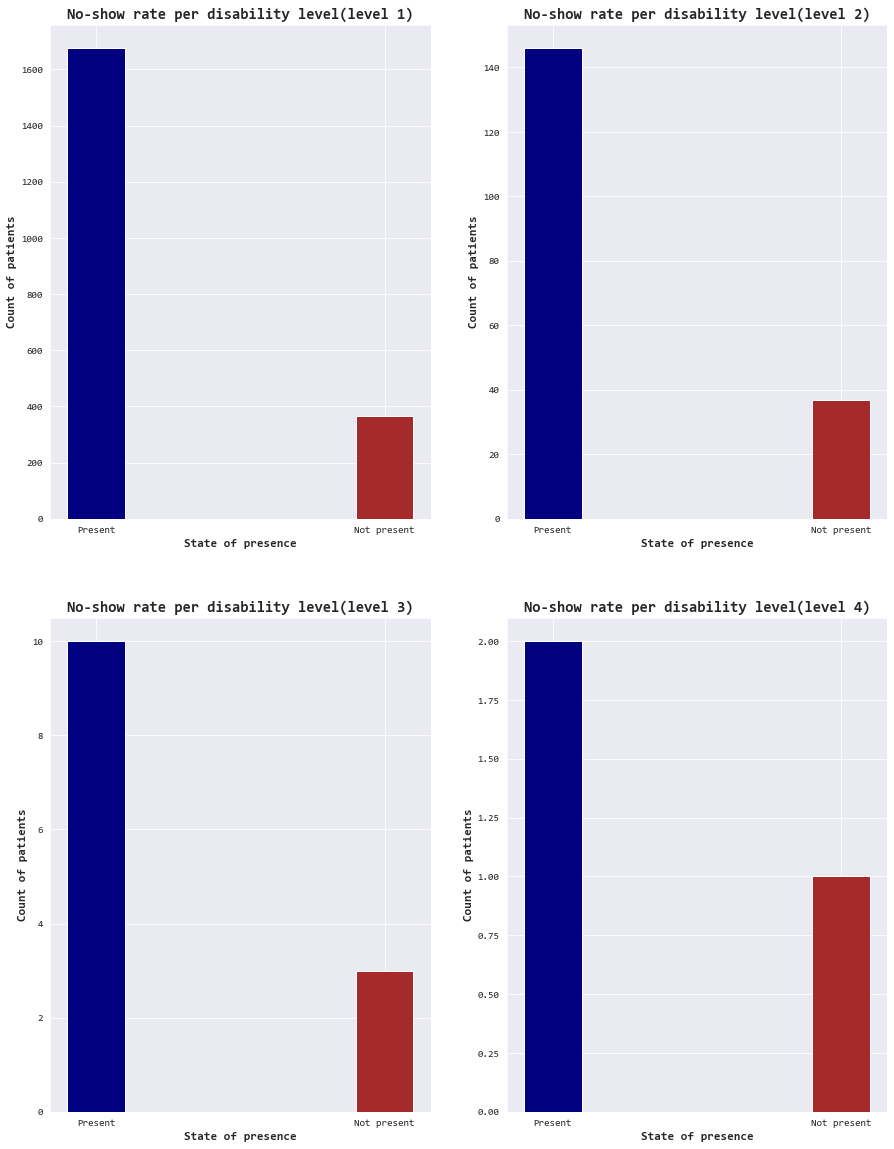

In [18]:
# adjusting size of figures
plt.figure(figsize = [15, 20])

# Plot bars
plt.subplot(2, 2, 1)
plot_bar([1, 2], hand_cap1, ['Present', 'Not present'], 'No-show rate per disability level(level 1)', 
         'State of presence', 'Count of patients',['navy', 'brown'])

plt.subplot(2, 2, 2)
plot_bar([1, 2], hand_cap2, ['Present', 'Not present'], 'No-show rate per disability level(level 2)', 
         'State of presence', 'Count of patients', ['navy', 'brown'])

plt.subplot(2, 2, 3)
plot_bar([1, 2], hand_cap3, ['Present', 'Not present'], 'No-show rate per disability level(level 3)', 
         'State of presence', 'Count of patients',['navy', 'brown'])

plt.subplot(2, 2, 4)
plot_bar([1, 2], hand_cap4, ['Present', 'Not present'], 'No-show rate per disability level(level 4)',
         'State of presence', 'Count of patients',['navy', 'brown'])


plt.show()




> Intersting find, no-show rate increases as the level of disability increases.
<br>

> Clinic shows no signs of not being disabled friendly, no-show rate with disabled pateints doesn't differ much from patients with 0 disability.

### Research Question 2  (Do people who get an appointment on the same day as they called show?)

In [19]:
# Filtering data to appointments on the same day as scheduled day
same_day = df.query('appointmentday.dt.day == scheduledday.dt.day').no_show.value_counts()
same_day

No     37381
Yes     2024
Name: no_show, dtype: int64

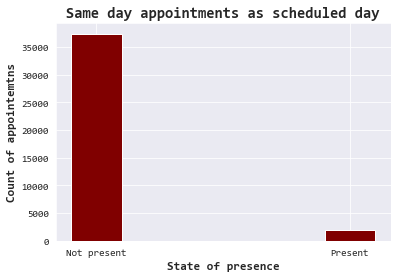

In [20]:
# Showing results with visualisations
plot_bar([1, 2], same_day,['Not present', 'Present'], 'Same day appointments as scheduled day', 'State of presence',
         'Count of appointemtns', 'maroon' )




> Looks like even if patients got an appointment on the same day as they called they show up and that's not considered an issue for them, probably same days appointments are emergency appointmetns so not much of people miss them.

### Researh question 3 (Does receiving a SMS affect presence?)

In [21]:
# Filtering data by people who got an sms
sms = df.query('sms_received == 1').no_show.value_counts()
no_sms = df.query('sms_received == 0').no_show.value_counts()

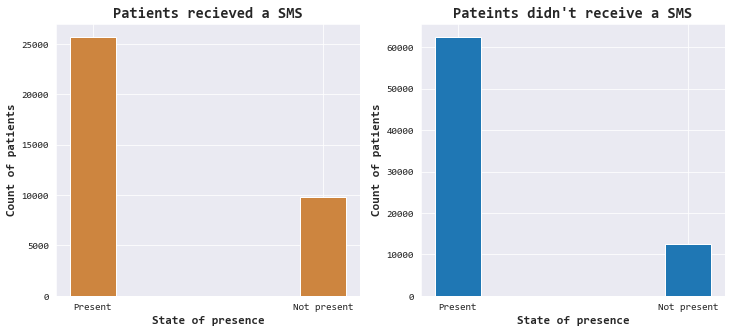

In [22]:
plt.figure(figsize = [12, 5])
# Plot bar
plt.subplot(1, 2, 1)

plot_bar([1, 2], sms, ['Present', 'Not present'], "Patients recieved a SMS", 'State of presence',
         'Count of patients', 'peru')

plt.subplot(1, 2, 2)
plot_bar([1, 2],no_sms, ['Present', 'Not present'], "Pateints didn't receive a SMS", 'State of presence',
         'Count of patients')


> Seems intersting that patients who received a SMS have a higher rate of no show than patient who didn't.

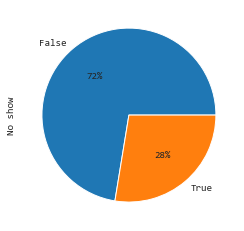

In [23]:
# Pie chart to see the percenatge of people who didn't show
sms.plot(kind = 'pie', autopct='%1.0f%%', labels=['False', 'True'])
plt.ylabel('No show');


> Receiving a SMS also doesn't affect patients showing up on their appointment, we can see the first bar with a huge portion of patients not receiving a SMS and even though they show up, yet a huge portion of people who actually recieved a SMS didn't show up which is curious.

In [24]:
sms

No     25698
Yes     9784
Name: no_show, dtype: int64

### Research question 4 (Which category of pateints don't show up more?)

In [25]:
# A function to help with plotting pie charts
def plot_pie(x, y_label, label, title):
    plt.pie(x, explode = (0, 0.1), shadow = True, autopct='%1.0f%%', labels = label)
    plt.ylabel(y_label, fontsize=9)
    plt.title(title, fontsize = 12, weight = 'bold')

In [26]:
# Filtering data based on having diabetes, hypertension and alcoholism
dia = df.query('diabetes == 1').no_show.value_counts()
hbp = df.query('hypertension == 1').no_show.value_counts()
alc = df.query('alcoholism == 1').no_show.value_counts()

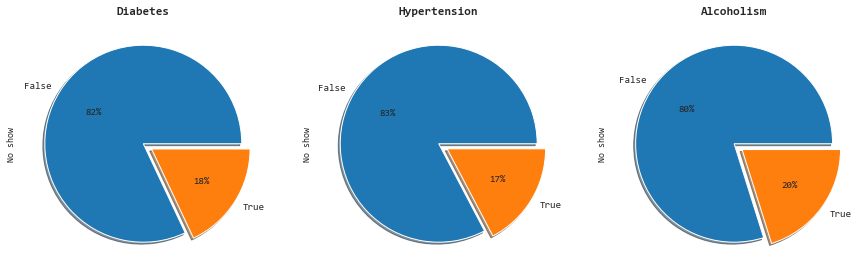

In [27]:
# Plotting charts
plt.figure(figsize=(15, 30))

plt.subplot(1, 3, 1)
plot_pie(dia, 'No show', ['False', 'True'], 'Diabetes')

plt.subplot(1, 3, 2)
plot_pie(hbp, 'No show', ['False', 'True'], 'Hypertension')

plt.subplot(1, 3, 3)
plot_pie(alc, 'No show', ['False', 'True'], 'Alcoholism')

> No much diffrence between three categories.

<a id='conclusions'></a>
## Conclusions
<br>

#### Q1: Is the clinic disabled friendly?
- Yes, the clinic is disabled friendly showing no increasing rate of no show rate than the original rate of the whole data set **(20%)**.
- There is an increasing rate of no show rate with the level of disability.
- I had one limitation considering doing analysis of no show rate of disabled patients which is the location of the clinic is not provided, I wanted to investigate more in the no show rate for the disabled patients.
<br>

#### Q2: Do people who get an appointment on the same day as they called show?
- Yes, patients with appointments on the same as they scheduled actually show up more than the original rate of the whole data set, my assumption was patients are not going to be ready or don't have a time, my explantion is they have emergency that's why they get an appointment on the same day.
- More investigation could have been done if the hour of the appointment day was documented in the data set.
<br>

#### Q3: Does receiving a SMS affect presence?
- No, receiving a SMS doesn't affect presence, patients who received a SMS actually have no show rate much higher than those who didn't receive a SMS with a percentage of **(28%)**, and much higher rate than the original rate of the whole data set.
<br>

#### Q4: Which category of patients don't show up more?
- All three categories have a similar no show rate Hypertension with **(17%)**, Diabetes with **(18%)**, and alcoholism with **(20%)** we can see that alcoholism have the most no show rate and closest to the original rate of the whole data set.
